# PROYECTO DE MACHINE LEARNING DE PRINCIPIO A FIN

In [1]:
'''
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("Se ha detectado una GPU en el entorno.")
else:
    print("No se ha detectado una GPU en el entorno.")'''

Se ha detectado una GPU en el entorno.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler,  StandardScaler, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
import joblib
import warnings

In [3]:
warnings.filterwarnings("ignore", category=FutureWarning)

## RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

### OBTENER LOS DATOS

In [3]:
def load_housing_data():
    try:
        return pd.read_csv("datos/housing.csv")
    except:
        print("Fichero no encontrado")

housing = load_housing_data()

### EXPLORAR LOS DATOS

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


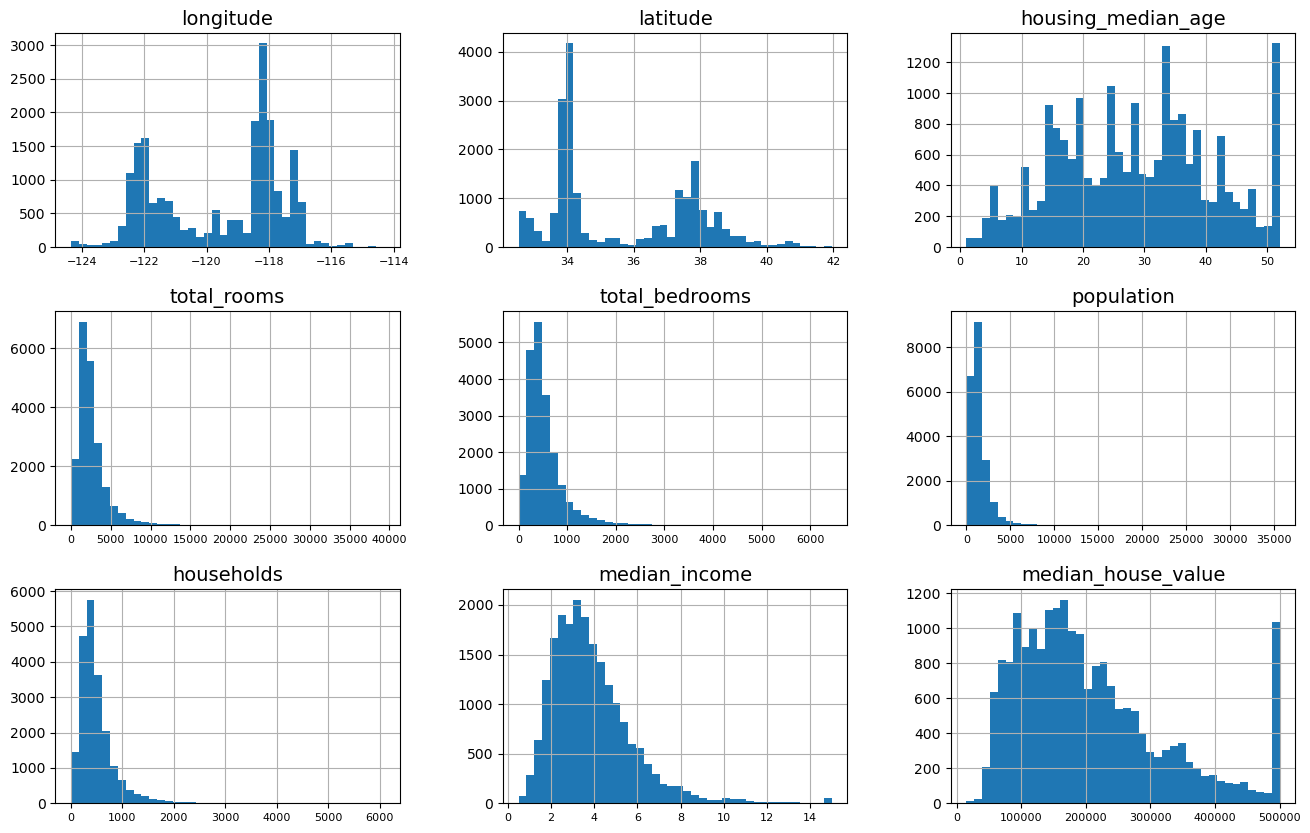

In [7]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=10)
housing.hist(bins=40, figsize=(16, 10))
plt.show()

### DIVIDIR LOS DATOS

In [8]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [9]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1,2,3,4,5])

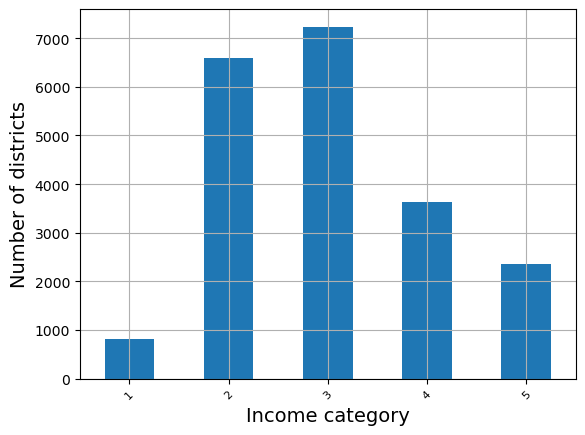

In [10]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=45, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [11]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [12]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [13]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)


income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### EXPLORAR LOS DATOS

In [15]:
housing = strat_train_set.copy()

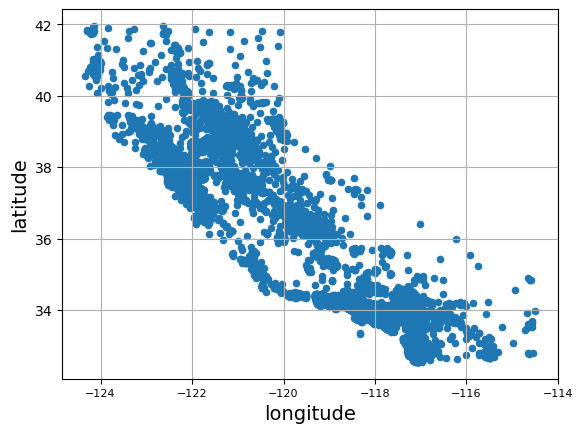

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

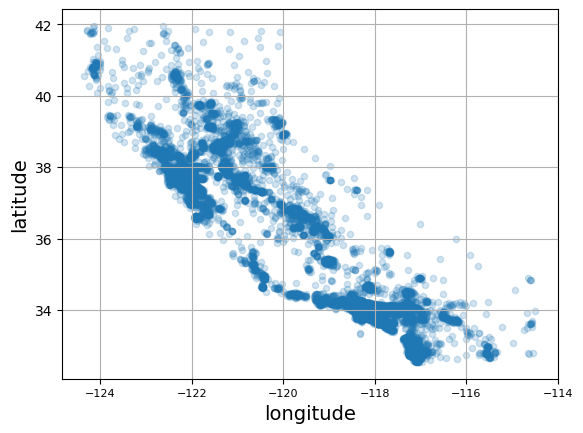

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

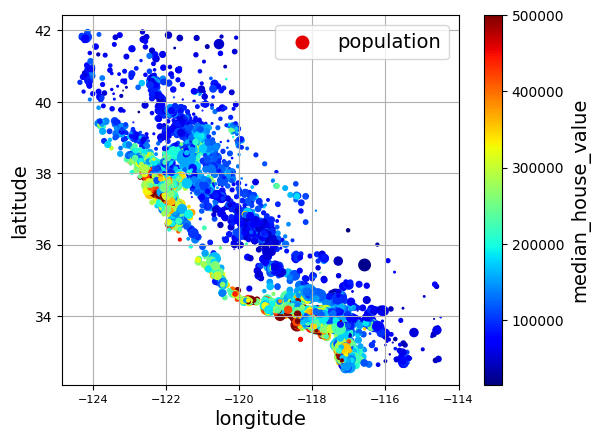

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True)
plt.show()

El argumento `sharex=False` es para arreglar un bug (sin el los valores y la etiqueta del eje x no se muestran).

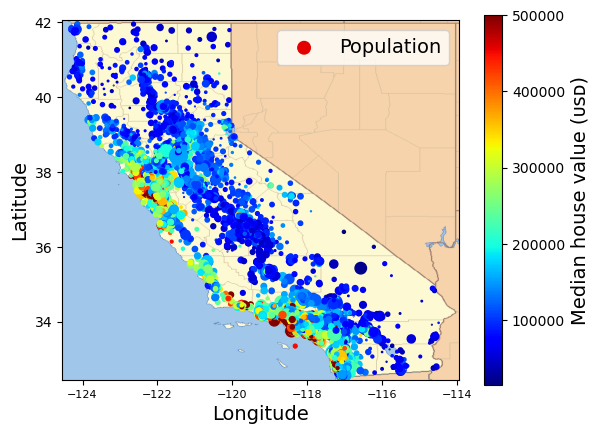

In [17]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True)
california_img = plt.imread("datos/california.png")
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)
plt.show()

#### BUSCAR CORRELACIONES

In [22]:
corr_matrix = housing.corr(numeric_only=True)

In [23]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

In [24]:
corr_matrix.style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


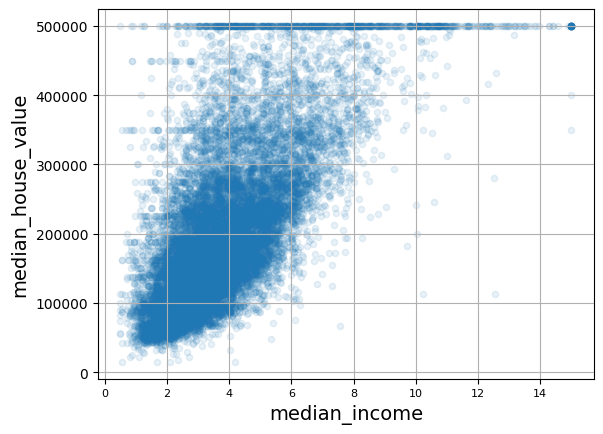

In [25]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()

### PREPARAR LOS DATOS

#### COMBINACIONES DE ATRIBUTOS

In [18]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [27]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

#### SEPARAR CARACTERÍSTICAS Y ETIQUETAS

In [19]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#### LIMPIAR LOS DATOS

Tenemos tres opciones para rellenar los valores ausentes:

```python
housing.dropna(subset=["total_bedrooms"], inplace=True)    # option 1

housing.drop("total_bedrooms", axis=1)       # option 2

median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```


In [20]:
imputer = SimpleImputer(strategy="median")

In [21]:
housing_num = housing.select_dtypes(include=[np.number])

In [22]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [23]:
X = imputer.transform(housing_num)
type(X)

numpy.ndarray

In [24]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

#### ATRIBUTOS DE TEXTO Y CATEGÓRICOS

In [26]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [27]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [28]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [29]:
df_output = pd.DataFrame(cat_encoder.transform(housing_cat).toarray(), columns=cat_encoder.get_feature_names_out(), index=housing_cat.index)
df_output


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
14207,1.0,0.0,0.0,0.0,0.0
13105,0.0,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,0.0,1.0
19121,1.0,0.0,0.0,0.0,0.0


#### ESCALADO DE CARACTERÍSTICAS Y TRANSFORMACIÓN

In [30]:
min_max_scaler = MinMaxScaler()
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [31]:
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

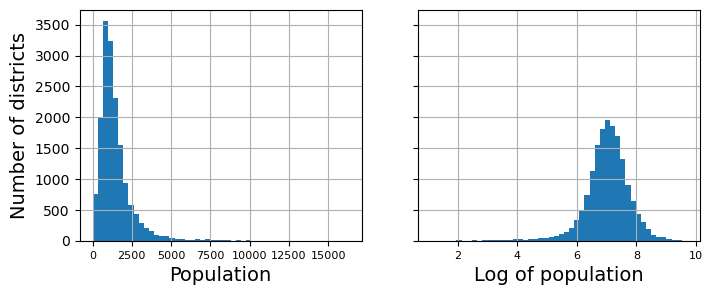

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
plt.show()

#### TRANSFORMADORES PERSONALIZADOS

In [33]:
log_transformer = FunctionTransformer(np.log)
log_pop = log_transformer.transform(housing[["population"]])

In [34]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [36]:
class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

#### PIPELINES DE TRANSFORMACIÓN

In [44]:
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [37]:
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [38]:
set_config(display='diagram')
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [40]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [41]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [42]:
df_housing_num_prepared.head(2)  # extra code

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942


In [43]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [44]:
num_pipeline[1]

StandardScaler()

In [45]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [46]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [47]:
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [48]:
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [49]:
housing_prepared = preprocessing.fit_transform(housing)

In [50]:
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index)
housing_prepared_fr.head(2)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0


In [51]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [59]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 16)

In [60]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__longitude', 'remainder__latitude',
       'remainder__housing_median_age'], dtype=object)

## ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

In [61]:
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x361...
                                                                   StandardScaler())]),
                                                  ['total_bedrooms',
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x3618c3b20>)])),
                ('linearregression', LinearRegression())])

In [62]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)  

array([259400., 358300., 126000., 110200., 299400.])

In [63]:
housing_labels[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [64]:
lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
lin_rmse

70631.32917770898

In [65]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [66]:
housing_test_predictions = lin_reg.predict(X_test)
lin_test_rmse = mean_squared_error(y_test, housing_test_predictions, squared=False)
lin_test_rmse

76807.17570362857

In [67]:
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x361...
                                                  ['total_bedrooms',
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x3618c3b20>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [68]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions,  squared=False)
tree_rmse

0.0

In [69]:
housing_test_predictions = tree_reg.predict(X_test)
tree_test_rmse = mean_squared_error(y_test, housing_test_predictions, squared=False)
tree_test_rmse

70075.85803300602

### EVALUACIÓN CRUZADA

In [70]:
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [71]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     70042.976853
std       2211.223510
min      67197.302832
25%      68117.719418
50%      70520.112088
75%      71261.203808
max      73874.610882
dtype: float64

In [72]:
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count       10.000000
mean     71771.894912
std       3933.709883
min      68141.823309
25%      69633.156896
50%      70741.297262
75%      71997.985442
max      82154.584623
dtype: float64

In [73]:
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [74]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     49632.089212
std       1020.064249
min      47620.869586
25%      49099.175089
50%      49749.949265
75%      50183.743922
max      51263.448191
dtype: float64

In [75]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)
forest_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
forest_rmse

18469.486046590784

## OPTIMIZACIÓN DEL MODELO

### BÚSQUEDA EXHAUSTIVA

In [76]:
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {
        "preprocessing__log__functiontransformer__func": [np.log, np.log1p],
        "random_forest__max_features": [4, 6, 8, 10],
    }
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x3618c3b20>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__log__functiontransformer__func': [<ufunc 'log'>,
                                                                            <ufunc 'log1p'>],
                          'random_forest__max_features': [4, 6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [77]:
grid_search.best_params_

{'preprocessing__log__functiontransformer__func': <ufunc 'log1p'>,
 'random_forest__max_features': 6}

In [78]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x3618712...
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x369172fa0>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

In [79]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

In [80]:
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__log__functiontransformer__func,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
5,2.708540,0.040080,0.084058,0.001803,<ufunc 'log1p'>,6,{'preprocessing__log__functiontransformer__fun...,-49116.597108,-49259.196054,-50009.633328,-49461.808830,391.720458,1
1,2.640828,0.021870,0.081146,0.000193,<ufunc 'log'>,6,{'preprocessing__log__functiontransformer__fun...,-49119.921131,-49263.288124,-50011.411629,-49464.873628,390.867722,2
6,3.513708,0.051877,0.082585,0.000515,<ufunc 'log1p'>,8,{'preprocessing__log__functiontransformer__fun...,-49348.018993,-49506.272548,-50461.584983,-49771.958842,491.900538,3
2,3.430074,0.009677,0.081499,0.000463,<ufunc 'log'>,8,{'preprocessing__log__functiontransformer__fun...,-49350.496516,-49506.151983,-50462.440603,-49773.029701,491.611432,4
0,1.905227,0.028870,0.085427,0.003581,<ufunc 'log'>,4,{'preprocessing__log__functiontransformer__fun...,-49659.754365,-49213.271428,-50537.918074,-49803.647956,550.273392,5
4,1.866935,0.014634,0.081538,0.000835,<ufunc 'log1p'>,4,{'preprocessing__log__functiontransformer__fun...,-49654.332465,-49214.094546,-50543.075328,-49803.834113,552.757051,6
3,4.228034,0.020267,0.081683,0.000337,<ufunc 'log'>,10,{'preprocessing__log__functiontransformer__fun...,-49680.800803,-49819.057984,-50427.127450,-49975.662079,324.185644,7
7,4.248309,0.020070,0.082101,0.000460,<ufunc 'log1p'>,10,{'preprocessing__log__functiontransformer__fun...,-49679.469771,-49821.792128,-50426.866491,-49976.042797,324.032319,8


In [81]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[[
    "param_preprocessing__log__functiontransformer__func",
    "param_random_forest__max_features",
    "split0_test_score",
    "split1_test_score",
    "split2_test_score",
    "mean_test_score",
]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["log_func", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res

,log_func,max_features,split0,split1,split2,mean_test_rmse
5,<ufunc 'log1p'>,6,49117,49259,50010,49462
1,<ufunc 'log'>,6,49120,49263,50011,49465
6,<ufunc 'log1p'>,8,49348,49506,50462,49772
2,<ufunc 'log'>,8,49350,49506,50462,49773
0,<ufunc 'log'>,4,49660,49213,50538,49804
4,<ufunc 'log1p'>,4,49654,49214,50543,49804
3,<ufunc 'log'>,10,49681,49819,50427,49976
7,<ufunc 'log1p'>,10,49679,49822,50427,49976


### BÚSQUEDA ALEATORIA

In [82]:
param_distribs = { 'preprocessing__log__functiontransformer__func': [np.log, np.log1p], 'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)
rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x3618c3b20>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__log__functiontransformer__func': [<ufunc 'log'>,
                                                                                          <ufunc 'log1p'>],
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x369159be0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [83]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[
    [
        "param_preprocessing__log__functiontransformer__func",
        "param_random_forest__max_features",
        "split0_test_score",
        "split1_test_score",
        "split2_test_score",
        "mean_test_score",
    ]
]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
8,<ufunc 'log1p'>,7,48872,49262,49870,49334
4,<ufunc 'log'>,5,49316,49236,50035,49529
1,<ufunc 'log'>,9,49248,49549,50359,49719
2,<ufunc 'log'>,8,49350,49506,50462,49773
5,<ufunc 'log1p'>,4,49654,49214,50543,49804


### OTROS

In [84]:
final_model = rnd_search.best_estimator_  
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.06, 0.06, 0.11, 0.02, 0.02, 0.02, 0.01, 0.35, 0.01, 0.15, 0.  ,
       0.  , 0.  , 0.08, 0.07, 0.04])

In [85]:
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()),  reverse=True)

[(0.3524278549190886, 'log__median_income'),
 (0.15430857024783234, 'cat__ocean_proximity_INLAND'),
 (0.11152207012042085, 'people_per_house__ratio'),
 (0.07677638156445867, 'remainder__longitude'),
 (0.06719647370408954, 'remainder__latitude'),
 (0.060639471465569535, 'bedrooms__ratio'),
 (0.05578209809208504, 'rooms_per_house__ratio'),
 (0.041608155790607664, 'remainder__housing_median_age'),
 (0.016317692505479004, 'log__total_rooms'),
 (0.015915318115305437, 'log__population'),
 (0.015468882724054852, 'log__total_bedrooms'),
 (0.014327519624211221, 'log__households'),
 (0.01065287031994883, 'cat__ocean_proximity_<1H OCEAN'),
 (0.0045723629694189635, 'cat__ocean_proximity_NEAR OCEAN'),
 (0.0022902311652259065, 'cat__ocean_proximity_NEAR BAY'),
 (0.00019404667220360706, 'cat__ocean_proximity_ISLAND')]

### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

In [86]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
final_predictions = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

49110.42998521564


## PRESENTACIÓN DE LA SOLUCIÓN

In [87]:
joblib.dump(final_model, "Recursos/my_california_housing_model.pkl")

['Recursos/my_california_housing_model.pkl']

In [88]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#    [...] Todas las funciones definidas por nosotros

final_model_reloaded = joblib.load("Recursos/my_california_housing_model.pkl")
new_data = housing[:5]  # vamos a suponer que son los datos de 5 distritos nuevos
predictions = final_model_reloaded.predict(new_data)

In [89]:
predictions

array([402487.04, 474428.19, 103505.  , 100775.  , 380105.1 ])